 GEORGIOS PSALTAKIS DIP AS 2

δηλώσεις import για διάφορες βιβλιοθήκες

In [1]:
import matplotlib.pyplot as plot
import matplotlib.image as img
import numpy as np
import skimage
from skimage import io
from skimage.color import rgb2gray
import scipy
import scipy.ndimage
import Image_formats_and_conversions as tools


ανάγνωση μιας εικόνας από ένα αρχείο

In [2]:
football_image= io.imread('football.jpg')

μετατρέπει μια εικόνα από τον χρωματικό χώρο RGB στον χρωματικό χώρο κλίμακας του γκρι χρησιμοποιώντας το rgb2gray

In [3]:
football_grayscale=rgb2gray(football_image)

πλοταρει την γκρίζα εικόνα 

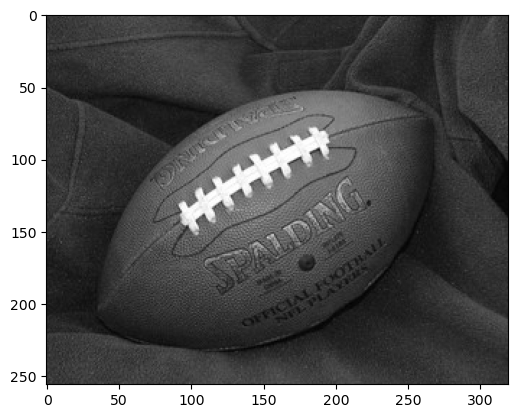

In [4]:
plot.imshow(football_grayscale, cmap=plot.cm.gray)
plot.show()

Κλιμακώνει και στρογγυλοποιεί τις τιμές σε μια εικόνα κλίμακας του γκρι και, στη συνέχεια, μετατρέπει τις προκύπτουσες τιμές σε ακέραιους αριθμούς 8-bit χωρίς πρόσημο. Αυτή η διαδικασία αναφέρεται συχνά ως "κανονικοποίηση".

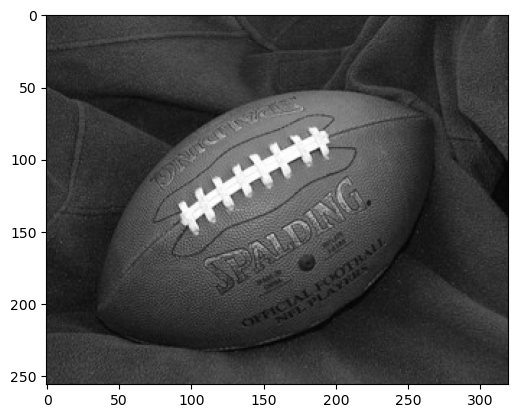

In [5]:
football_grayscale_norm = (football_grayscale * 255).round().astype(np.uint8)
plot.imshow(football_grayscale_norm, cmap=plot.cm.gray)


In [6]:
np.max(football_grayscale_norm)


255

Ο κώδικας εφαρμόζει έναν λογαριθμικό μετασχηματισμό σε μια εικόνα κλίμακας του γκρι, προκειμένου να συμπιέσει το δυναμικό εύρος της εικόνας και να κάνει πιο ορατές τις λεπτομέρειες στις πιο σκούρες και ανοιχτές περιοχές της εικόνας. Στη συνέχεια, η μετασχηματισμένη εικόνα εμφανίζεται με τη χρήση ενός χρωματικού χάρτη κλίμακας του γκρι.

/var/folders/40/yhmrrf_d22j97dt3z6stqt6h0000gn/T/ipykernel_966/3288810540.py:3: RuntimeWarning: divide by zero encountered in log
  football_grayscale_norm_log=b * np.log( 1 + log_zero_avoidance * football_grayscale_norm)


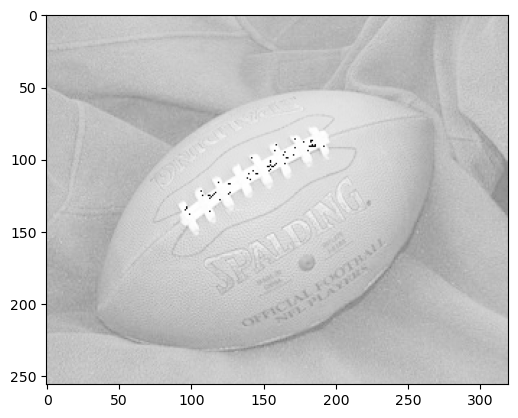

In [7]:
log_zero_avoidance = 1
b = 255 / (np.log( 1 + 255 * log_zero_avoidance ))
football_grayscale_norm_log=b * np.log( 1 + log_zero_avoidance * football_grayscale_norm)
football_grayscale_norm_log = np.array(football_grayscale_norm_log, dtype = np.uint8)
plot.imshow(football_grayscale_norm_log, cmap=plot.cm.gray)     

Τα πλοτάρω όλα μαζί. 

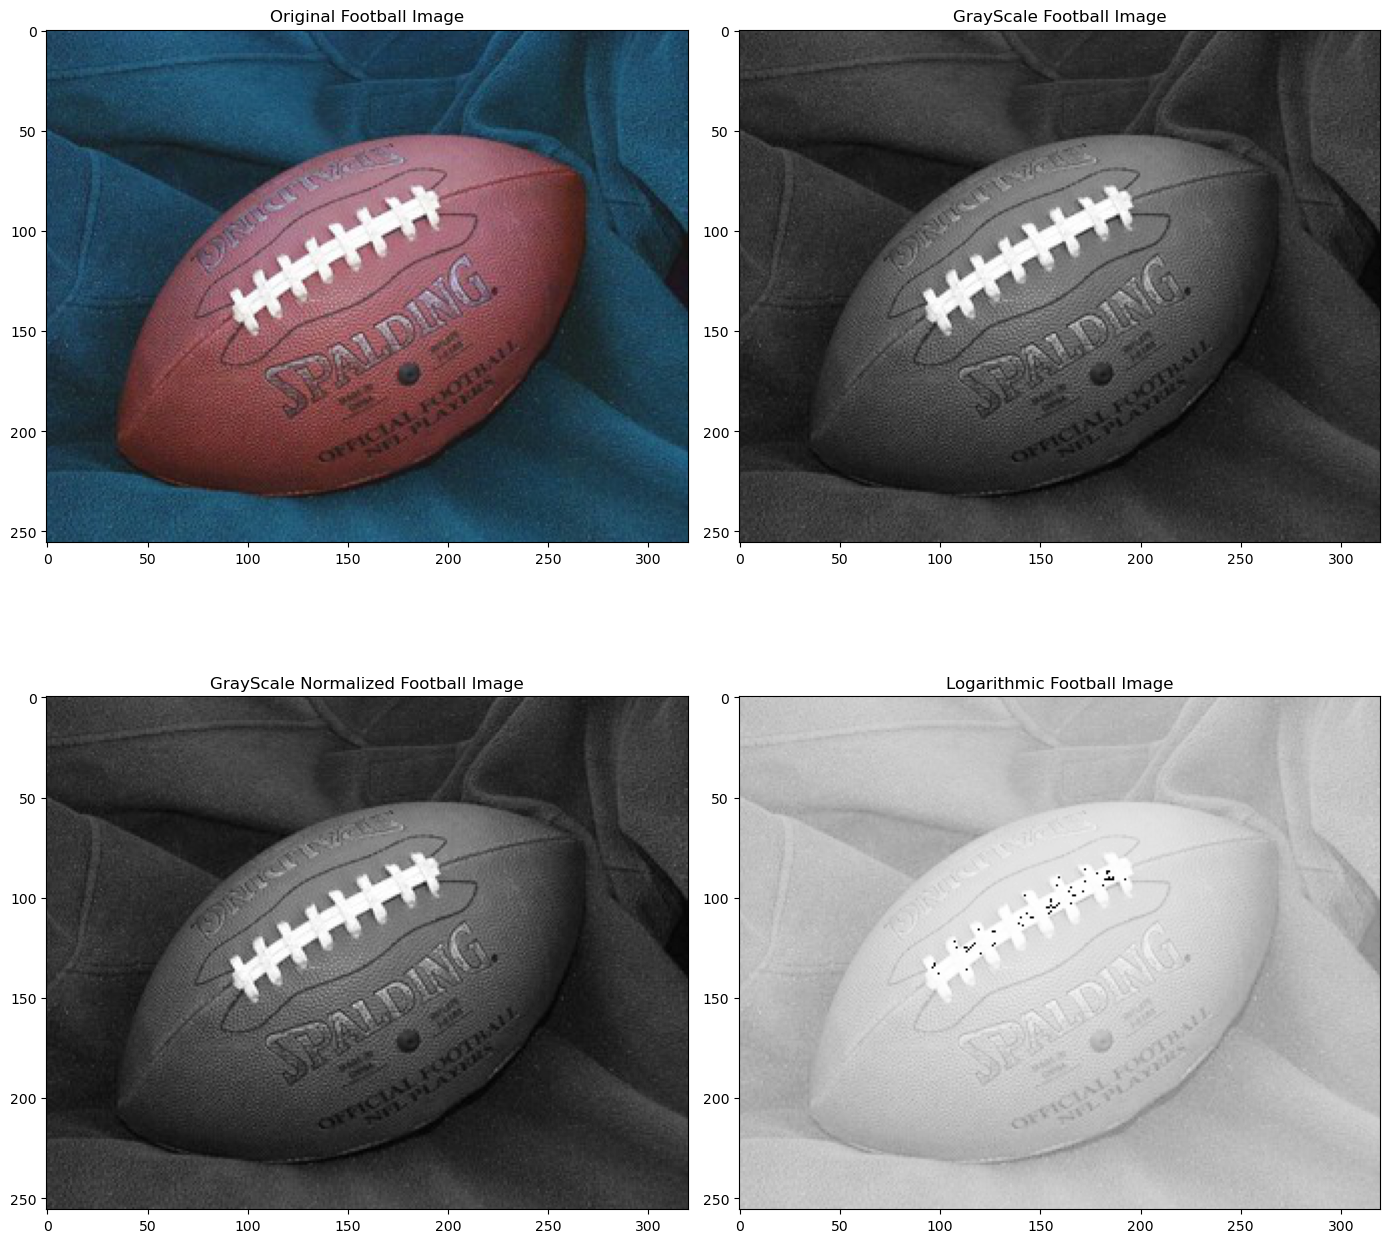

In [8]:
figure1 = plot.figure(1, figsize=(14, 14))

subplot1 = figure1.add_subplot(2,2,1)
plot.imshow(football_image ,cmap='gray')
subplot1.set_title('Original Football Image')

subplot1 = figure1.add_subplot(2,2,2)
plot.imshow(football_grayscale ,cmap='gray')
subplot1.set_title('GrayScale Football Image')

subplot1 = figure1.add_subplot(2,2,3)
plot.imshow(football_grayscale_norm ,cmap='gray')
subplot1.set_title('GrayScale Normalized Football Image')

subplot1 = figure1.add_subplot(2,2,4)
plot.imshow(football_grayscale_norm_log ,cmap='gray')
subplot1.set_title('Logarithmic Football Image')

figure1.tight_layout()

Αυτός ο κώδικας προσθέτει τυχαίο γκαουσιανό θόρυβο στην εικόνα football_grayscale_norm και αποθηκεύει την προκύπτουσα θορυβώδη εικόνα στη μεταβλητή cm_image_noise. Η ποσότητα του θορύβου που προστίθεται στην εικόνα  ποικίλλει τυχαία, σύμφωνα με τημ κατανομή Gauss.

In [9]:
cm_image_noise = skimage.util.random_noise(football_grayscale_norm, mode='gaussian')
cm_image_noise.shape

(256, 320)

Την πλοτάρω αυτή την εικόνα 

Text(0.5, 0.98, 'Cameraman With Gaussian Noise')

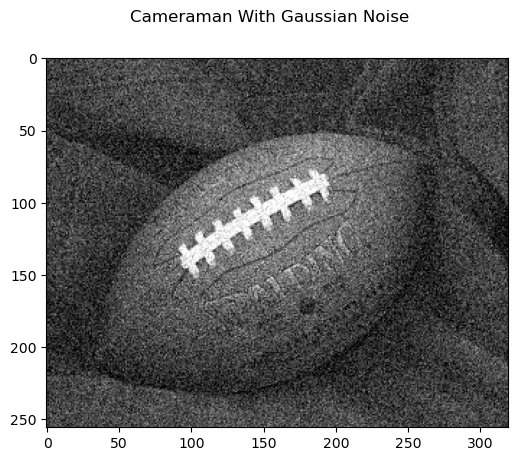

In [10]:
plot.figure(1)
plot.imshow(cm_image_noise, cmap="gray")
plot.suptitle("Cameraman With Gaussian Noise")

/var/folders/40/yhmrrf_d22j97dt3z6stqt6h0000gn/T/ipykernel_966/1745014710.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  cm_image_denoise = scipy.ndimage.filters.gaussian_filter(cm_image_noise, sigma=2.5)


Text(0.5, 0.98, 'Football With Gaussian Noise Removed')

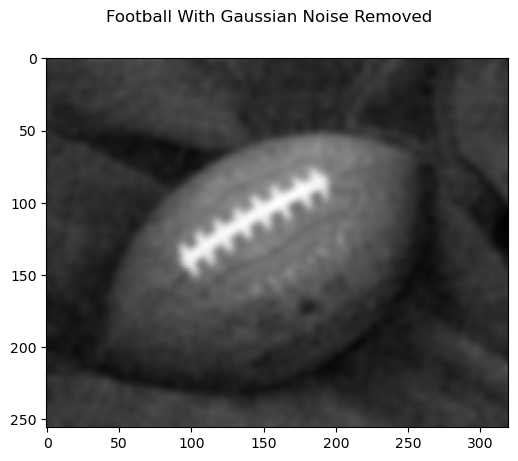

In [28]:
cm_image_denoise = scipy.ndimage.filters.gaussian_filter(cm_image_noise, sigma=2.5)
plot.figure(2)
plot.imshow(cm_image_denoise, cmap="gray")
plot.suptitle("Football With Gaussian Noise Removed")

παράγει αρχικά έναν kernel συνέλιξης Gauss με προκαθορισμένο μέγεθος (5x5) και τυπική απόκλιση (4,5), ο οποίος θα χρησιμοποιηθεί για να θολώσει την εικόνα και να ελαχιστοποιήσει την ορατότητα του θορύβου. Στη συνέχεια, το φίλτρο Gauss εφαρμόζεται στην εικόνα εισόδου μέσω της συνέλιξής της με τον kernel, ο οποίος εξομαλύνει επιτυχώς την εικόνα και μειώνει την ορατότητα του θορύβου. Τέλος η φιλτραρισμένη εικόνα κανονικοποιείται.

Text(0.5, 0.98, 'Football With Gaussian Noise Removed')

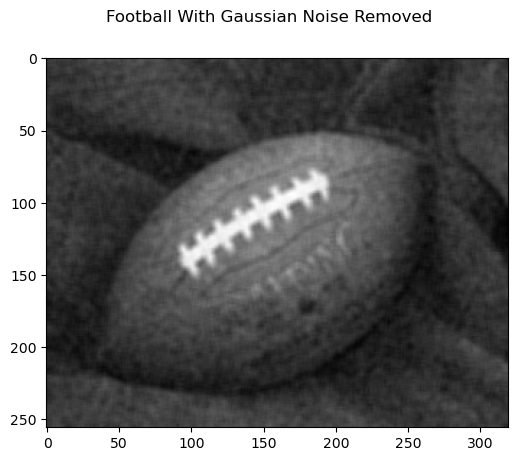

In [29]:
Gauss_mask_1_7 = tools.fspecial_gauss2D((5,5),4.5)
Image_filtered_by_mask_1_7 = scipy.ndimage.convolve(cm_image_noise,Gauss_mask_1_7)

# Images Normalization
Image_filtered_by_mask_1_7 = (Image_filtered_by_mask_1_7 - np.min(Image_filtered_by_mask_1_7)) * 255 / ( np.max(Image_filtered_by_mask_1_7) - np.min(Image_filtered_by_mask_1_7) )

# round values
Image_filtered_by_mask_1_7 = np.around(Image_filtered_by_mask_1_7)
# convert float to int
denoise_final = np.asarray(Image_filtered_by_mask_1_7, dtype=np.uint8)

plot.figure(2)
plot.imshow(denoise_final, cmap="gray")
plot.suptitle("Football With Gaussian Noise Removed")

Ideal Low Pass Filter

Ο κώδικας υλοποιεί ένα χαμηλοπερατό φίλτρο για την αφαίρεση του θορύβου από μια εικόνα. Το φίλτρο χρησιμοποιεί τον δισδιάστατο διακριτό μετασχηματισμό Fourier (DFT) για να μετατρέψει την εικόνα από το χωρικό πεδίο στο πεδίο της συχνότητας, εφαρμόζει μια κυκλική μάσκα στον DFT για να αφαιρέσει τις συνιστώσες υψηλής συχνότητας και στη συνέχεια εφαρμόζει τον αντίστροφο DFT για να μετατρέψει την εικόνα πίσω στο χωρικό πεδίο. Αυτό έχει ως αποτέλεσμα μια φιλτραρισμένη εικόνα με μειωμένο θόρυβο.

In [13]:
columns, rows = cm_image_noise.shape[:2]

cm_vertical = np.linspace(-127, 128, rows)
cm_horizontal = np.linspace(-127, 128, columns)

cm_x, cm_y = np.meshgrid(cm_vertical, cm_horizontal)

cm_distance = np.sqrt(np.power(cm_x,2)+np.power(cm_y,2))

cm_threshold = cm_distance < 25

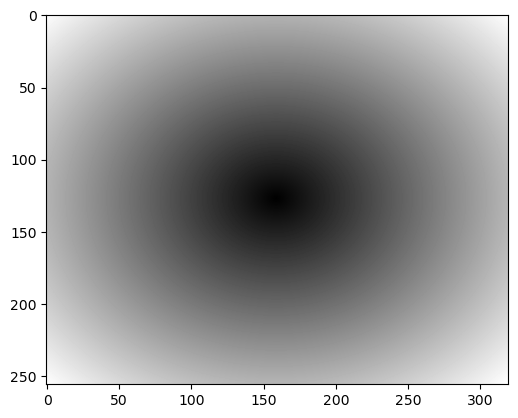

In [14]:
plot.imshow(cm_distance, cmap='gray')

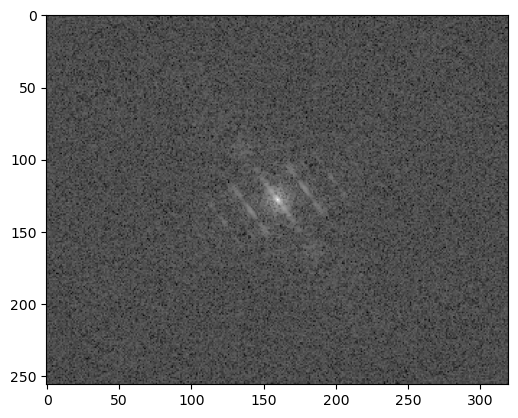

In [15]:
football_DFT = np.fft.fft2(cm_image_noise)
football_centered_DFT= np.fft.fftshift(football_DFT)
football_centered_DFT_normalized = np.log(1+np.abs(football_centered_DFT)) 

plot.imshow(football_centered_DFT_normalized, cmap='gray')

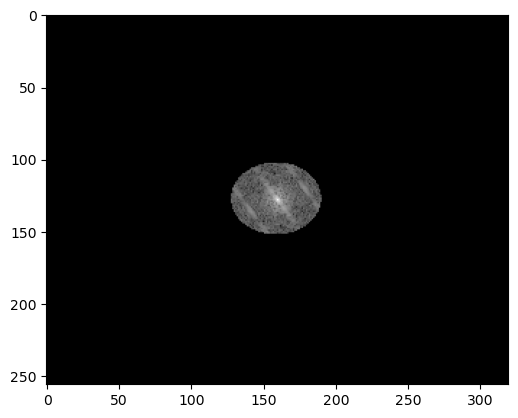

In [16]:
football_circle = cm_threshold * football_centered_DFT
football_circle_normalized = np.log(1+np.abs(football_circle))
football_circle_final = tools.float_to_uint8(football_circle_normalized)

plot.imshow(football_circle_final, cmap='gray')

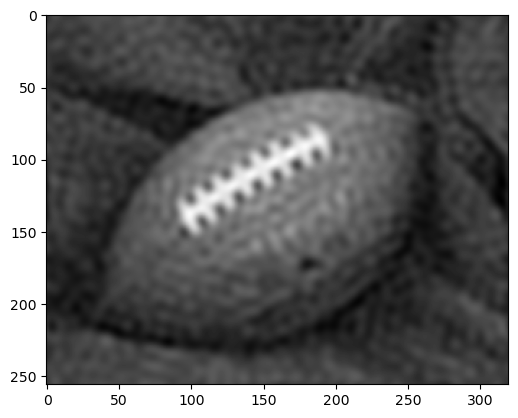

In [17]:
football_filtered_image = np.fft.ifft2(football_circle)
football_image_inverted_DFT_normalized = np.log(1+np.abs(football_filtered_image))

plot.imshow(football_image_inverted_DFT_normalized, cmap='gray')

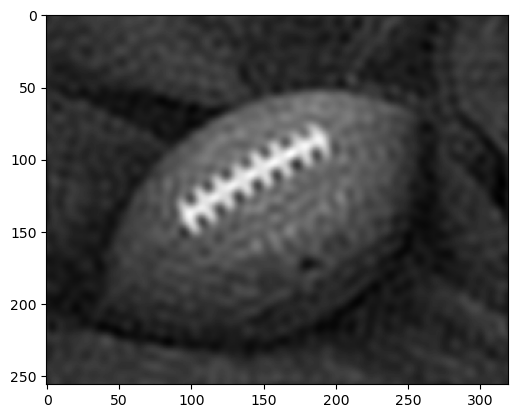

In [18]:
football_filtered_image_normalized = np.abs(football_filtered_image)
football_filtered_image_normalized = tools.float_to_float64(football_filtered_image_normalized)
plot.imshow(football_filtered_image_normalized, cmap='gray')

Text(0.5, 1.0, 'Filtered image')

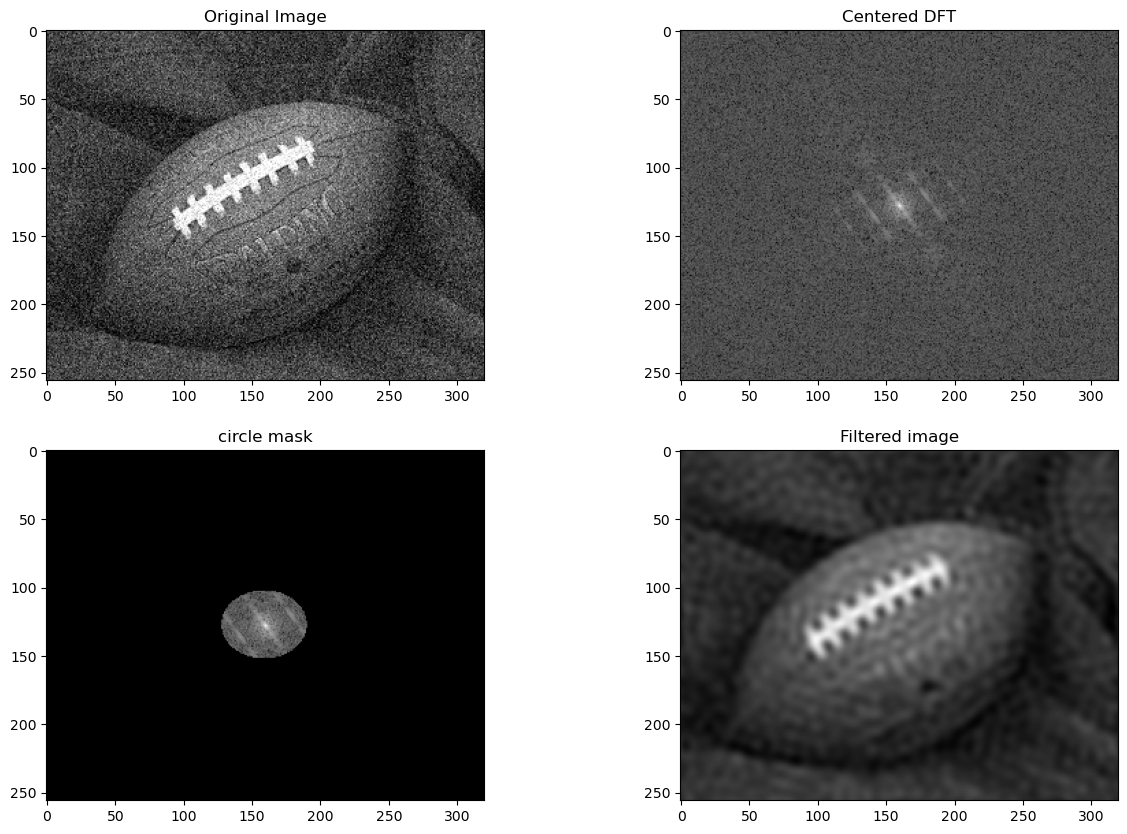

In [19]:
figure9 = plot.figure(figsize=(15,10))

subplot = figure9.add_subplot(2,2,1)
plot.imshow(cm_image_noise, cmap="gray")
subplot.set_title('Original Image')

subplot = figure9.add_subplot(2,2,2)
plot.imshow(football_centered_DFT_normalized, cmap="gray")
subplot.set_title('Centered DFT')

subplot = figure9.add_subplot(2,2,3)
plot.imshow(football_circle_final, cmap="gray")
subplot.set_title('circle mask')

subplot = figure9.add_subplot(2,2,4)
plot.imshow(football_filtered_image_normalized, cmap="gray")
subplot.set_title('Filtered image')

Butterworth Low Pass Filter

Ο κώδικας υπολογίζει πρώτα τον δισδιάστατο διακριτό μετασχηματισμό Fourier (DFT) της εικόνας εισόδου, ο οποίος μετατρέπει την εικόνα από το χωρικό πεδίο στο πεδίο της συχνότητας. Στη συνέχεια, εφαρμόζει μια κυκλική μάσκα στον DFT της εικόνας για την αφαίρεση συνιστωσών υψηλής συχνότητας, η οποία μπορεί να μειώσει αποτελεσματικά την ορατότητα του θορύβου στην εικόνα. Τέλος, εφαρμόζει τον αντίστροφο DFT στον μασκαρισμένο DFT της εικόνας για να τον μετατρέψει ξανά στο χωρικό πεδίο, με αποτέλεσμα μια φιλτραρισμένη εικόνα με μειωμένο θόρυβο.

In [63]:
columns=len(cm_image_noise)
rows=len(cm_image_noise[0])

cm_vertical = np.linspace(-127, 128, rows)
cm_horizontal = np.linspace(-127, 128, columns)

cm_x,cm_y = np.meshgrid(cm_vertical, cm_horizontal)

cm_distance = np.sqrt(np.power(cm_x,2) + np.power(cm_y,2))

In [64]:
cm_image_DFT = np.fft.fft2(cm_image_noise)
cm_Image_Centered_DFT = np.fft.fftshift(cm_image_DFT)

cm_Image_Centered_DFT_normalized = np.log(1 + np.abs(cm_Image_Centered_DFT))
cm_Image_Centered_DFT_Final = tools.float_to_uint8(cm_Image_Centered_DFT_normalized)

Η υψηλότερη τάξη και μια υψηλότερη τιμή βάσης είναι πιο αποτελεσματική στη μείωση της ορατότητας του γκαουσιανού θορύβου για αυτο επέλεξα και εγώ ν=4 και βάση=40

In [65]:
n=4
base=40
cm_threshold_n2 = 1 / (1+(np.power(cm_distance,2*n) / np.power(base,2*n)))

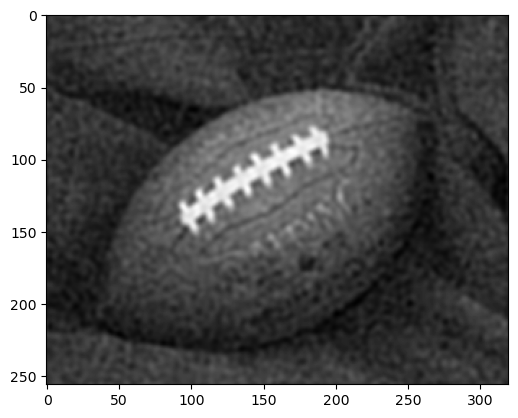

In [66]:
# mask
cm_mask_circle_n_2 = cm_threshold_n2 * cm_Image_Centered_DFT
cm_mask_circle_normalized_n_2 = np.log( 1 + np.abs(cm_mask_circle_n_2))
cm_mask_circle_final_n_2 = tools.float_to_uint8(cm_mask_circle_normalized_n_2)

#filtered image
cm_Filtered_image_n_2 = np.fft.ifft2(cm_mask_circle_n_2)
cm_Filtered_image_normalized_n_2 = np.abs(cm_Filtered_image_n_2)
cm_Filtered_image_final_n_2 = tools.float_to_float64(cm_Filtered_image_normalized_n_2)

plot.imshow(cm_Filtered_image_final_n_2, cmap='gray')

Text(0.5, 1.0, 'Butterworth Low Pass Filter')

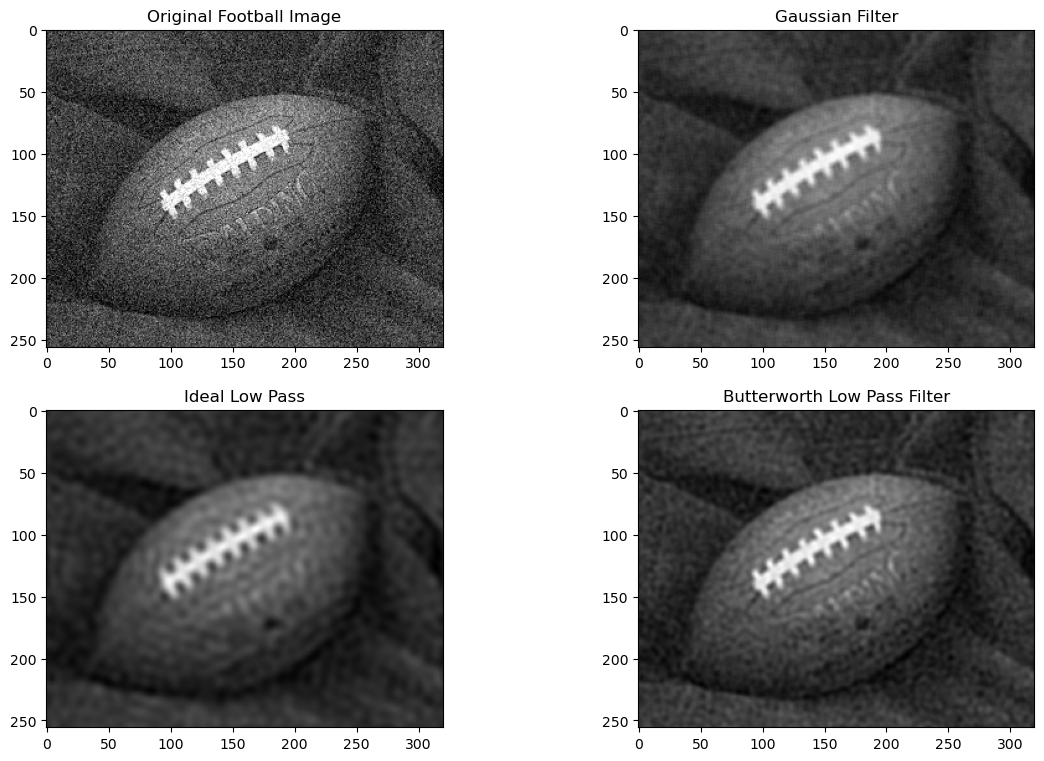

In [67]:
figure2=plot.figure(2, figsize=(14, 14))

subplot2=figure2.add_subplot(3,2,1)
plot.imshow(cm_image_noise,cmap="gray")
subplot2.set_title('Original Football Image')

subplot2=figure2.add_subplot(3,2,2)
plot.imshow(denoise_final,cmap="gray")
subplot2.set_title('Gaussian Filter')

subplot2=figure2.add_subplot(3,2,3)
plot.imshow(football_filtered_image_normalized,cmap="gray")
subplot2.set_title('Ideal Low Pass')

subplot2=figure2.add_subplot(3,2,4)
plot.imshow(cm_Filtered_image_final_n_2,cmap="gray")
subplot2.set_title('Butterworth Low Pass Filter')


Σε γενικές γραμμές το butterworth φιλτρο είναι το καλύτερο αλλα και το φίλτρο Gauss έχει σχεδιαστεί ειδικά για την αφαίρεση του γκαουσιανού θορύβου από μια εικόνα και για αυτό βλέπουμε αναλυτικά οτι μειώνει αποτελεσματικα την ορατότητα του γκαουσιανού θορύβου που προσθέσαμε. Οπότε σε γενικές γραμμές το μπάττερ είναι πιο καλό ναι μέν λόγο του οτι αφαίρει πίο πολύ τα χιόνια αλλα και του γκαουσιάνό φίλτρό είναι αρκετά αποτελεσματικό. 

In [51]:
columns=len(denoise_final)
rows=len(denoise_final[0])

cm_vertical = np.linspace(-127, 128, rows)
cm_horizontal = np.linspace(-127, 128, columns)

cm_x,cm_y = np.meshgrid(cm_vertical, cm_horizontal)

cm_distance = np.sqrt(np.power(cm_x,2) + np.power(cm_y,2))

In [68]:
cm_image_DFT = np.fft.fft2(denoise_final)
cm_Image_Centered_DFT = np.fft.fftshift(cm_image_DFT)

cm_Image_Centered_DFT_normalized = np.log(1 + np.abs(cm_Image_Centered_DFT))
cm_Image_Centered_DFT_Final = tools.float_to_uint8(cm_Image_Centered_DFT_normalized)

In [69]:
n=5
base=60
cm_threshold_n2 = 1 / (1+(np.power(cm_distance,2*n) / np.power(base,2*n)))

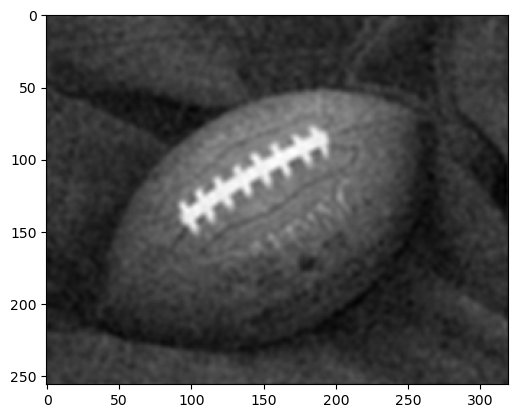

In [70]:
# mask
cm_mask_circle_n_2 = cm_threshold_n2 * cm_Image_Centered_DFT
cm_mask_circle_normalized_n_2 = np.log( 1 + np.abs(cm_mask_circle_n_2))
cm_mask_circle_final_n_2 = tools.float_to_uint8(cm_mask_circle_normalized_n_2)

#filtered image
cm_Filtered_image_n_2 = np.fft.ifft2(cm_mask_circle_n_2)
cm_Filtered_image_normalized_n_2 = np.abs(cm_Filtered_image_n_2)
cm_Filtered_image_final_n_2 = tools.float_to_float64(cm_Filtered_image_normalized_n_2)

plot.imshow(cm_Filtered_image_final_n_2, cmap='gray')

Εδώ δοκίμασα το να φιλτράρω την εικόνα απο το γκαουσιανο φιλτρο με το φιλτρο butterworth για να έχω τα καλύτερα αποτελέσματα και απο θολότητα και απο αφαιρεση θορύβου. 